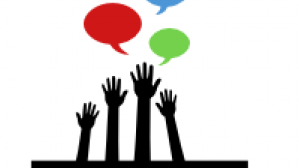

#GRIPJAN 23 - Task 2 - Prediction using Spervised ML - Linear Regression  Model
#The Sparks Foundation
#Data Science and Business Analytics Internship
#Predict the percentage of an student based on the no. of study hours
#Mohammad Saim Khan

# 1. Loading required packages and importing the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
np.set_printoptions(precision=3)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [ ]:
df = pd.read_csv('../input/student-study-hours/score.csv')
df['Scores'] = df['Scores'].astype('float64')

# 2. Getting to know the dataset
Here we will look at the dataset we have using different function provided by the pandas package

In [ ]:
df.head()

,Hours,Scores
0,2.5,21.0
1,5.1,47.0
2,3.2,27.0
3,8.5,75.0
4,3.5,30.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     float64
dtypes: float64(2)
memory usage: 528.0 bytes


We have two fields: hours and scores. We will be using the hours feature as our predictor and the scores as our value.

In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
df = df.rename(columns={'Hours': 'hours', 'Scores': 'score'})
list(df.columns)

['hours', 'score']

<AxesSubplot:xlabel='hours', ylabel='score'>

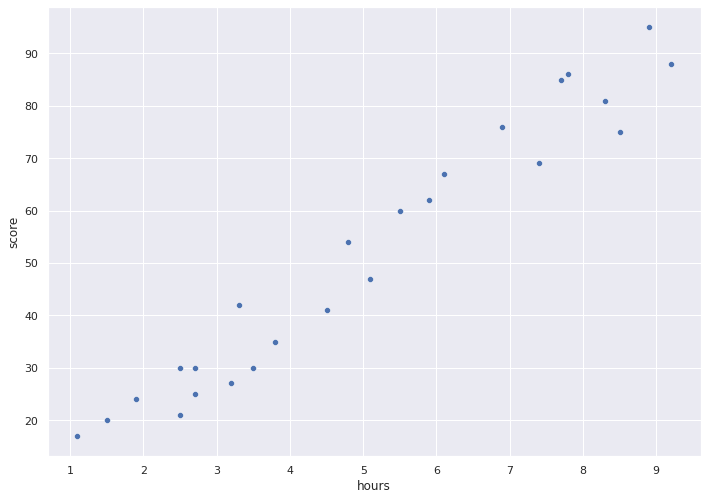

In [ ]:
sns.scatterplot(data=df, x="hours", y="score")

In [ ]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(df.drop('score', axis=1))

# 3. Feature Normalization
First of all, we are going to normalize our features. Normalization helps the gradient descent to reach the optimal point earlier.

range before normalization:  8.1


<AxesSubplot:xlabel='hours', ylabel='Count'>

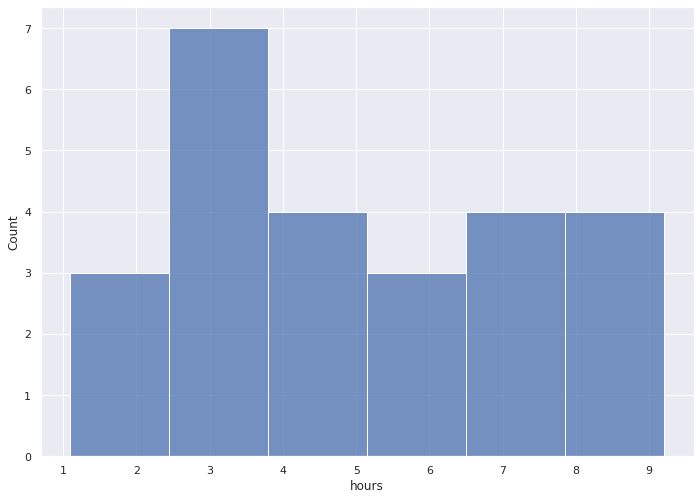

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
print('range before normalization: ', np.ptp(df['hours']))
sns.histplot(data = df['hours'])

range after normalization:  3.27394849187266


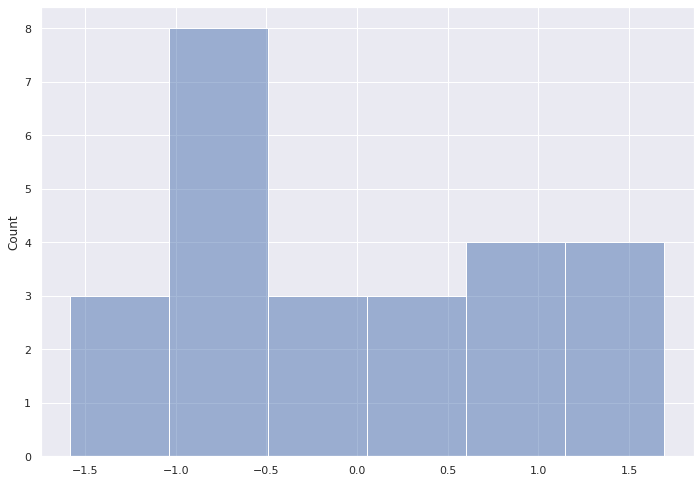

In [ ]:
print('range after normalization: ', np.ptp(X_norm))
fig, ax = plt.subplots()
sns.histplot(data=X_norm)
plt.legend([],[], frameon=False)
plt.show()

# 4. Modeling

In [ ]:
y_train = df['score']

In [ ]:
sgdr = SGDRegressor()
sgdr.fit(X_norm, y_train)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

number of iterations completed: 138, number of weight updates: 3451.0


In [ ]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:   w: {w_norm}, b:{b_norm}")

model parameters:   w: [24.124], b:[51.354]


In [ ]:
y_pred_sgd = sgdr.predict(X_norm)

In [ ]:
temp_df = pd.DataFrame(X_norm, y_pred_sgd).reset_index().rename(columns = {0: 'hours', 'index': 'score'})
temp_df.head()

,score,hours
0,26.860360,-1.015328
1,52.211765,0.035569
2,33.685738,-0.732394
3,85.363602,1.409819
4,36.610900,-0.611137


Aftem defining the model and predicting the values for our normalized feature(s) we are going to plot them to see how well the model performed!

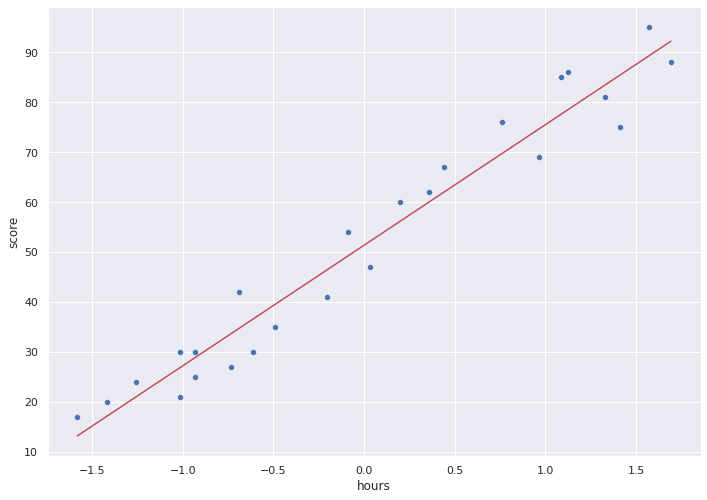

In [ ]:
x = np.linspace(temp_df['hours'].min(),temp_df['hours'].max(),2)
y = w_norm*x+b_norm
sns.scatterplot(x=temp_df['hours'], y=df['score'])
plt.plot(x, y, '-r')

# 5. Conclusion and future projects

Linear Regression is the bread and butter of all data modeling! In this notebook we had a very simple linear regression model predict student scores based on the hours of studying they did. There is also the issue of the maximum possible score. If the maximum score is 100 then our model is not going to perform very well for students who have studied 15 hours for example. Because of that using another feature like the square root of the number of hours could be useful.  
In future projects we can use training and testing sets of data to compare our different models, use other kinds of models and also if we have more than one feature we can try and experiment with them to see how they impact our accuracy. If we had multiple features we could have also used polynomial regression to get our results.
Good luck!

In [ ]:
def normalize_hours(x):
    return ([[x]] - np.mean(df['hours'])) / np.std(df['hours'])

x = 10
normalized_x = normalize_hours(x)
print(float(normalized_x), float(sgdr.predict(normalized_x)))

2.0161055651186213 99.98941253789978
